In [10]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import joblib

##lets load House Bosten Pricing Dataset

In [11]:
from sklearn.datasets import fetch_california_housing


In [12]:
from sklearn.datasets import fetch_california_housing
import os

cache_path = os.path.expanduser('~/scikit_learn_data/california_housing.tgz')

# Delete corrupted file if exists
if os.path.exists(cache_path):
    os.remove(cache_path)

housing = fetch_california_housing()


In [13]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

Description of the dataset

In [14]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [15]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseValue'] = housing.target



In [16]:
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  


In [17]:
# 2️⃣ Split Features & Target
X = df.drop("MedHouseValue", axis=1)
y = df["MedHouseValue"]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# 4️⃣ Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
# Save scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [21]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}


In [22]:
results = {}



In [23]:

for name, model in models.items():
    if name == "Linear Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = (mse, r2)

    print(f"\n{name} Performance:")
    print("MSE:", mse)
    print("R2 Score:", r2)



Linear Regression Performance:
MSE: 0.5558915986952442
R2 Score: 0.575787706032451

Random Forest Performance:
MSE: 0.2539759249192041
R2 Score: 0.8061857564039718

Gradient Boosting Performance:
MSE: 0.2939973248643864
R2 Score: 0.7756446042829697


In [24]:

# Choose best model (highest R2)
best_model_name = max(results, key=lambda x: results[x][1])
best_model = models[best_model_name]

In [25]:
print("\n🔥 Best Model:", best_model_name)


🔥 Best Model: Random Forest


In [26]:

# Save best model
joblib.dump(best_model, "best_model.pkl")
print("Model saved as best_model.pkl")


Model saved as best_model.pkl


In [27]:
if best_model_name == "Linear Regression":
    y_pred = best_model.predict(X_test_scaled)
else:
    y_pred = best_model.predict(X_test)

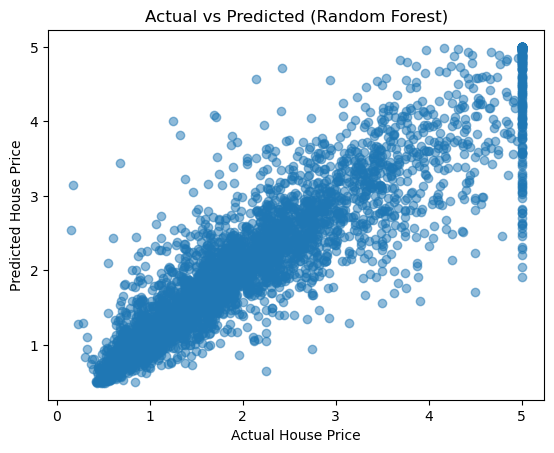

In [28]:

plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title(f"Actual vs Predicted ({best_model_name})")
plt.show()
